# 计算理论集卡成功比列

In [135]:
from sympy import *

In [136]:
# 定义i
i = Symbol('i')
n = Symbol('n')
m = Symbol('m')
# 计算P(n, m) 显示公式
P_n_m = summation((-1)**i * binomial(m, i) * (m - i)**n, (i, 0, m)) / (m ** n)
P_n_m

m**(-n)*Sum((-1)**i*(-i + m)**n*binomial(m, i), (i, 0, m))

In [137]:
# 集卡成功人数比列
m = 7
n = 10
P_n_m = summation((-1)**i * binomial(m, i) * (m - i)**n, (i, 0, m)) / (m ** n)
print(float(P_n_m))

0.10491255465713387


In [139]:
# 个人集齐卡片的期望次数，对主办方用处不大
m = 7
Em = m * summation(1/i, (i, 1, m))
float(Em)

18.15

# 模拟抽卡统计

In [10]:
import numpy
import random
import matplotlib.pyplot as plt

In [130]:
# 发卡程序，这里简单的返回1-m的随机数,这个地方可以使用真正的发卡程序
def lottery(m):
    return random.randint(1, m)

In [131]:
# 模拟一个人集卡，集齐后返回刮卡次数
def hit(m, n):
    # 设置m张初始卡片都是0
    card = [0 for i in range(m)]
    count = 0
    # 为了方便模拟设置了最大刮卡次数n，当达到最大次数后不再抽奖直接返回count
    while count < n:
        c = lottery(m)
        # 将抽中的卡片对应记录设置为0
        card[c-1] = 1
        count += 1
        # 当m张卡片都是集齐后返回刮奖次数
        if numpy.sum(card) == m:
            return 'succ', count
    return 'fail', count

In [132]:
# 绘制分布曲线 感觉这个图没有啥意义不直观
def show(data, m, n, peoples, succ_percent, current_time):
    x = numpy.linspace(0, n + 1, n + 1)
    y = data
#     plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，表示没有字体，还是英文吧
    plt.plot(x, y)
    plt.title('{} peoples hit cards'.format(peoples))
    plt.xlabel('succeed hit numbers')
    plt.ylabel("probability distribution")
    plt.savefig('./模拟{}人集{}张卡每人最多抽{}次：{:.2%}人集齐{}.png'.format(peoples, m, n,
                                                             succ_percent, current_time), dpi=150)
    plt.show()

In [150]:
# 输出统计结果表格
def save_excle(res_succ, m, n, peoples, current_time):
    df_res_succ = pd.DataFrame()
    df_res_succ['成功时的抽卡次数'] = [x for x in range(n + 1)]
    df_res_succ['成功集齐人数'] = res_succ
    third_column_name = '占总抽卡人数({})的比列'.format(peoples)
    df_res_succ[third_column_name] = df_res_succ['成功集齐人数'] / peoples
    succ_percent = df_res_succ[third_column_name].sum()
    df_res_succ.to_excel('./模拟{}人集{}张卡每人最多抽{}次：{:.2%}人集齐{}.xlsx'.format(peoples, m, n,
                                                                       succ_percent, current_time), index=False)
    return succ_percent

成功集卡人数比列：10.53%


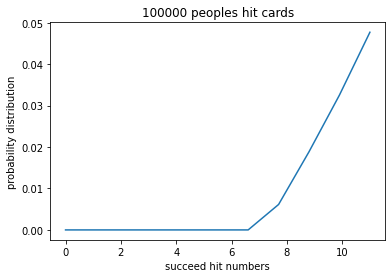

CPU times: user 9.25 s, sys: 22.4 ms, total: 9.27 s
Wall time: 9.27 s


In [151]:
%%time
# m 为卡片数
m = 7
# 最大刮卡次数n
n = 10
res_succ = [0 for x in range(n + 1)]
# peoples为模拟抽奖人数
peoples = 100000  # 极客时间大概10万人参加活动
for i in range(peoples):
    res, c = hit(m, n)
    if res == 'succ':
        res_succ[c] = res_succ[c]+1
# current_time 当前时间
current_time = time.strftime('%Y-%m-%d_%H：%M：%S', time.localtime(time.time()))
succ_percent = save_excle(res_succ, m, n, peoples, current_time)
print('成功集卡人数比列：{:.2%}'.format(succ_percent))
show(numpy.array(res_succ)/peoples, m, n, peoples, succ_percent, current_time)